Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

Load Dataset

In [2]:
df = pd.read_csv("../data/processed_random_imbalanced.csv")

TF-IDE

In [3]:
X_text = df["clean_text"]
y = df["job_role"]

tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,2),
    sublinear_tf=True
)

X = tfidf.fit_transform(X_text)

Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=100)

Train Random Forest

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=100,
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Predict

In [7]:
y_pred = rf_model.predict(X_test)
y_pred

array(['Game Developer', 'DevOps Engineer', 'Machine Learning Engineer',
       'UI/UX Designer', 'System Administrator', 'Cloud Engineer',
       'Network Engineer', 'Cloud Engineer', 'QA Engineer',
       'System Administrator', 'AI Engineer', 'UI/UX Designer',
       'Frontend Developer', 'System Administrator',
       'Mobile App Developer', 'Network Engineer',
       'Site Reliability Engineer', 'Cloud Engineer',
       'Machine Learning Engineer', 'Security Engineer',
       'Penetration Tester', 'Cloud Engineer',
       'Machine Learning Engineer', 'Mobile App Developer',
       'Penetration Tester', 'Software Engineer', 'DevOps Engineer',
       'QA Engineer', 'Cybersecurity Analyst', 'DevOps Engineer',
       'Full Stack Developer', 'Backend Developer', 'Penetration Tester',
       'UI/UX Designer', 'UI/UX Designer', 'Data Scientist',
       'AI Engineer', 'Penetration Tester', 'Data Scientist',
       'Data Analyst', 'Frontend Developer', 'DevOps Engineer',
       'Frontend D

Report

In [8]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

              AI Engineer       1.00      1.00      1.00        14
        Backend Developer       1.00      1.00      1.00        31
           Cloud Engineer       0.93      0.96      0.95        28
    Cybersecurity Analyst       0.96      1.00      0.98        26
             Data Analyst       0.86      0.95      0.90        20
           Data Scientist       1.00      0.91      0.95        23
          DevOps Engineer       1.00      0.88      0.94        26
       Frontend Developer       0.92      0.96      0.94        24
     Full Stack Developer       1.00      0.88      0.93        24
           Game Developer       1.00      0.95      0.98        22
Machine Learning Engineer       0.95      0.91      0.93        22
     Mobile App Developer       0.87      0.87      0.87        15
         Network Engineer       0.86      0.96      0.91        26
       Penetration Tester       0.96      1.00      0.98     

Confusion_matrix

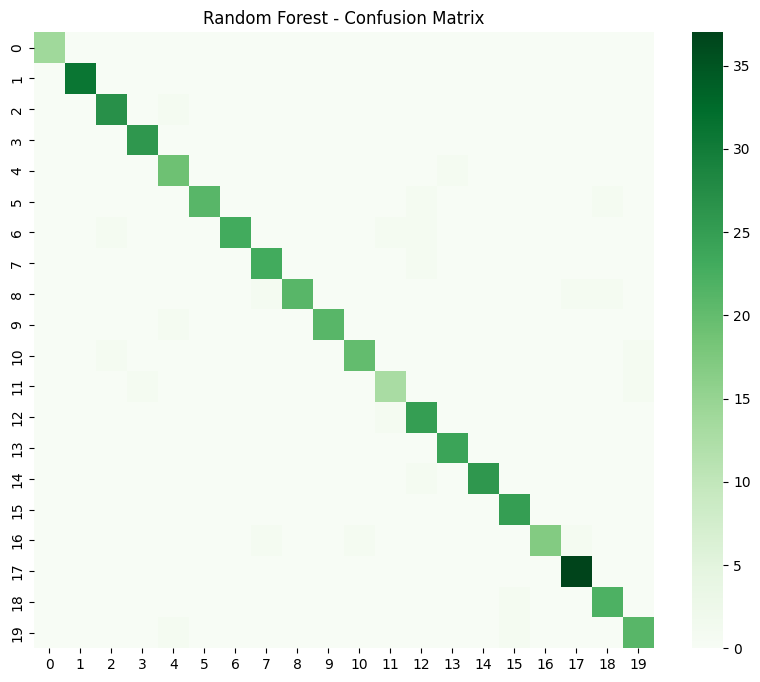

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()